In [67]:
import re
import pandas as pd

In [68]:
f = open('WhatsApp Chat with slow.txt', 'r', encoding='utf-8')

In [69]:
data = f.read()

In [70]:
type(data)

str

In [71]:
#print(data)

In [72]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [73]:
messages = re.split(pattern, data)[1:]
#messages

In [92]:
re.split('a', 'avit')

['', 'vit']

In [75]:
re.sub('a','','avit')

'vit'

In [76]:
a = re.sub(pattern, '|', data) # re.sub(pattern, replacement, string, count=0, flags=0)

#a

In [77]:
dates=re.findall(pattern, data)
#dates

In [78]:
df = pd.DataFrame({'user_message': messages, 'message_date':dates})
#convert message_date type to datetime
df['message_date']=pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date':'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2020-08-23 10:08:00
1,Avit Rai Hodibu☻: class vo vhane message gara\n,2020-08-23 10:08:00
2,slow: Kto WiFi sakiyexa feri\n,2020-08-23 10:38:00
3,slow: Darshan ko\n,2020-08-23 10:38:00
4,Avit Rai Hodibu☻: barbad\n,2020-08-23 10:39:00


In [79]:
df.shape

(3602, 2)

In [80]:
# separate users and message
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    # \w → Matches any word character (letters, digits, underscore).
    #\W → Matches any non-word character (spaces, punctuation, symbols, etc.).
    # ? meaning it stops at the first possible match instead of the last.
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)

df.head()

,date,user,message
0,2020-08-23 10:08:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-08-23 10:08:00,Avit Rai Hodibu☻,class vo vhane message gara\n
2,2020-08-23 10:38:00,slow,Kto WiFi sakiyexa feri\n
3,2020-08-23 10:38:00,slow,Darshan ko\n
4,2020-08-23 10:39:00,Avit Rai Hodibu☻,barbad\n


In [81]:
df['year']=df['date'].dt.year

In [82]:
df.head()

,date,user,message,year
0,2020-08-23 10:08:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020
1,2020-08-23 10:08:00,Avit Rai Hodibu☻,class vo vhane message gara\n,2020
2,2020-08-23 10:38:00,slow,Kto WiFi sakiyexa feri\n,2020
3,2020-08-23 10:38:00,slow,Darshan ko\n,2020
4,2020-08-23 10:39:00,Avit Rai Hodibu☻,barbad\n,2020


In [83]:
df['month']=df['date'].dt.month
df.head()

,date,user,message,year,month
0,2020-08-23 10:08:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020,8
1,2020-08-23 10:08:00,Avit Rai Hodibu☻,class vo vhane message gara\n,2020,8
2,2020-08-23 10:38:00,slow,Kto WiFi sakiyexa feri\n,2020,8
3,2020-08-23 10:38:00,slow,Darshan ko\n,2020,8
4,2020-08-23 10:39:00,Avit Rai Hodibu☻,barbad\n,2020,8


In [84]:
df['day']=df['date'].dt.day

In [85]:
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2020-08-23 10:08:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020,8,23,10,8
1,2020-08-23 10:08:00,Avit Rai Hodibu☻,class vo vhane message gara\n,2020,8,23,10,8
2,2020-08-23 10:38:00,slow,Kto WiFi sakiyexa feri\n,2020,8,23,10,38
3,2020-08-23 10:38:00,slow,Darshan ko\n,2020,8,23,10,38
4,2020-08-23 10:39:00,Avit Rai Hodibu☻,barbad\n,2020,8,23,10,39


In [86]:
df[df['user']== 'slow'].shape

(1891, 8)

In [87]:
words =[]
for message in df['message']:
    words.extend(message.split())
len(words)

16187

In [88]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("hy www.google.com is best site. another is www.bing.com. i like")
urls

['www.google.com', 'www.bing.com']

In [89]:
!pip install urlextract

In [90]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [93]:
len(links)

141

In [94]:
df['user'].value_counts().head()

slow                  1891
Avit Rai Hodibu☻      1709
group_notification       2
Name: user, dtype: int64

In [95]:
import matplotlib.pyplot as plt

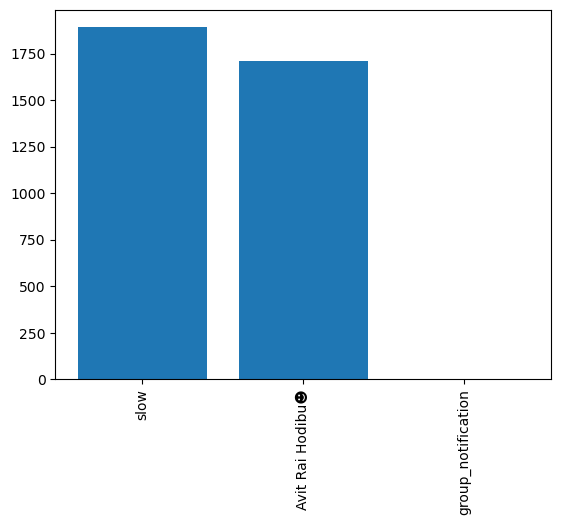

In [101]:
x= df['user'].value_counts().head()
name = x.index
count = x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [103]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,slow,52.50
1,Avit Rai Hodibu☻,47.45
2,group_notification,0.06
